In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def opt_chains(ticker):
    asset = yf.Ticker(ticker)
    expiries = asset.options

    chains = pd.DataFrame()

    for expiration in expiries:
        # tuple of two dataframes
        opt = asset.option_chain(expiration)
        calls = opt.calls
        calls['optionType'] = 'call'

        puts = opt.puts
        puts["optionType"] = "put"

        chain = pd.concat([calls, puts])
        chain['expiration'] = (
            pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=59)
        )
        chains = pd.concat([chains, chain])
    chains["daysToExpiration"] = (chains.expiration - dt.datetime.today()).dt.days + 1
    return chains


In [3]:
options = opt_chains("TSLA")
options


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,TSLA240913C00075000,2024-09-09 13:30:08+00:00,75.0,140.70,144.55,145.95,0.0,0.0,6.0,17,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
1,TSLA240913C00090000,2024-09-06 13:50:30+00:00,90.0,134.37,129.65,130.85,0.0,0.0,10.0,10,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
2,TSLA240913C00095000,2024-08-29 16:38:11+00:00,95.0,117.55,124.05,125.30,0.0,0.0,3.0,5,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
3,TSLA240913C00100000,2024-09-09 19:38:28+00:00,100.0,116.87,119.60,120.90,0.0,0.0,3.0,52,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
4,TSLA240913C00105000,2024-08-08 19:12:18+00:00,105.0,95.07,103.80,108.05,0.0,0.0,NaN,3,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,TSLA261218P00500000,2024-09-06 19:54:14+00:00,500.0,291.30,282.70,286.40,0.0,0.0,2.0,201,0.400458,True,REGULAR,USD,put,2026-12-18 23:59:59,830
71,TSLA261218P00510000,2024-07-24 14:54:43+00:00,510.0,294.26,290.65,296.60,0.0,0.0,1.0,20,0.409399,True,REGULAR,USD,put,2026-12-18 23:59:59,830
72,TSLA261218P00520000,2024-08-13 14:06:08+00:00,520.0,315.05,303.20,304.95,0.0,0.0,1.0,36,0.393072,True,REGULAR,USD,put,2026-12-18 23:59:59,830
73,TSLA261218P00530000,2024-08-23 18:00:37+00:00,530.0,313.04,312.55,314.30,0.0,0.0,2.0,13,0.389319,True,REGULAR,USD,put,2026-12-18 23:59:59,830


In [4]:
calls = options[options["optionType"] == "call"]
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,TSLA240913C00075000,2024-09-09 13:30:08+00:00,75.0,140.70,144.55,145.95,0.000000,0.000000,6.0,17,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
1,TSLA240913C00090000,2024-09-06 13:50:30+00:00,90.0,134.37,129.65,130.85,0.000000,0.000000,10.0,10,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
2,TSLA240913C00095000,2024-08-29 16:38:11+00:00,95.0,117.55,124.05,125.30,0.000000,0.000000,3.0,5,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
3,TSLA240913C00100000,2024-09-09 19:38:28+00:00,100.0,116.87,119.60,120.90,0.000000,0.000000,3.0,52,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
4,TSLA240913C00105000,2024-08-08 19:12:18+00:00,105.0,95.07,103.80,108.05,0.000000,0.000000,NaN,3,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,TSLA261218C00500000,2024-09-10 16:28:21+00:00,500.0,29.45,29.60,30.05,1.400001,4.991093,222.0,2763,0.611591,False,REGULAR,USD,call,2026-12-18 23:59:59,830
70,TSLA261218C00510000,2024-09-10 14:32:25+00:00,510.0,30.00,28.75,29.30,2.549999,9.289615,1.0,453,0.612232,False,REGULAR,USD,call,2026-12-18 23:59:59,830
71,TSLA261218C00520000,2024-09-09 14:31:03+00:00,520.0,27.95,28.00,28.45,0.550001,2.007303,10.0,643,0.612614,False,REGULAR,USD,call,2026-12-18 23:59:59,830
72,TSLA261218C00530000,2024-09-10 15:18:48+00:00,530.0,28.50,27.20,27.65,2.459999,9.447000,151.0,642,0.612721,False,REGULAR,USD,call,2026-12-18 23:59:59,830


In [5]:
# expiration to plot
calls_at_expiry = calls[calls["expiration"] == "2024-09-13 23:59:59"]
calls_at_expiry

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,TSLA240913C00075000,2024-09-09 13:30:08+00:00,75.0,140.70,144.55,145.95,0.0,0.0,6.0,17,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
1,TSLA240913C00090000,2024-09-06 13:50:30+00:00,90.0,134.37,129.65,130.85,0.0,0.0,10.0,10,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
2,TSLA240913C00095000,2024-08-29 16:38:11+00:00,95.0,117.55,124.05,125.30,0.0,0.0,3.0,5,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
3,TSLA240913C00100000,2024-09-09 19:38:28+00:00,100.0,116.87,119.60,120.90,0.0,0.0,3.0,52,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
4,TSLA240913C00105000,2024-08-08 19:12:18+00:00,105.0,95.07,103.80,108.05,0.0,0.0,NaN,3,0.000010,True,REGULAR,USD,call,2024-09-13 23:59:59,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,TSLA240913C00400000,2024-09-05 18:53:43+00:00,400.0,0.01,0.00,0.01,0.0,0.0,7.0,159,1.687502,False,REGULAR,USD,call,2024-09-13 23:59:59,4
83,TSLA240913C00410000,2024-08-29 19:33:16+00:00,410.0,0.01,0.00,0.01,0.0,0.0,57.0,52,1.750001,False,REGULAR,USD,call,2024-09-13 23:59:59,4
84,TSLA240913C00420000,2024-09-09 13:30:06+00:00,420.0,0.01,0.00,0.01,0.0,0.0,35.0,42,1.812501,False,REGULAR,USD,call,2024-09-13 23:59:59,4
85,TSLA240913C00430000,2024-08-29 13:38:56+00:00,430.0,0.01,0.00,0.01,0.0,0.0,60.0,531,1.875001,False,REGULAR,USD,call,2024-09-13 23:59:59,4


<Axes: title={'center': 'Implied Volatility Skew'}, xlabel='strike'>

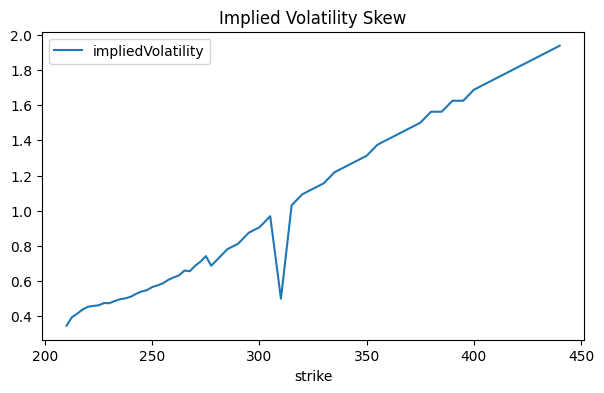

In [6]:
# filter out the low vols
filtered_calls_at_expiry = calls_at_expiry[calls_at_expiry.impliedVolatility  >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_calls_at_expiry[["strike",  "impliedVolatility"]].set_index("strike").plot(
	title = "Implied Volatility Skew", figsize=(7, 4)
)


<Axes: title={'center': 'Implied Volatility Term Structure'}, xlabel='expiration'>

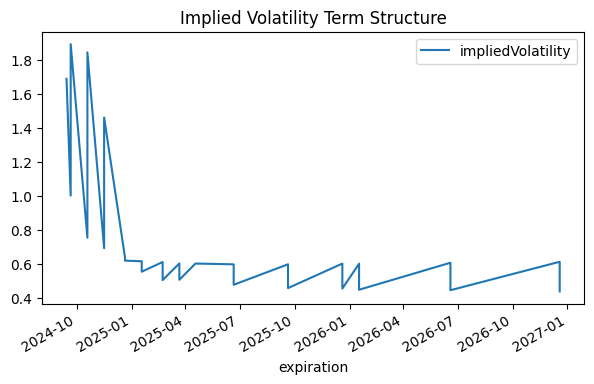

In [7]:
# select the expiry to plot
calls_at_strike = options[options["strike"] == 400.0]

# filter out low vols
filtered_calls_at_strike = calls_at_strike[calls_at_strike.impliedVolatility >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_calls_at_strike[["expiration", "impliedVolatility"]].set_index("expiration").plot(
	title = "Implied Volatility Term Structure", figsize=(7, 4)
)

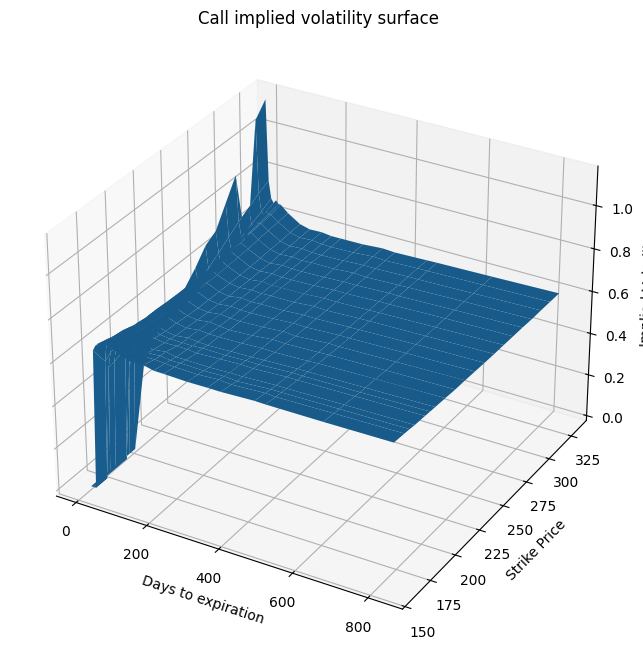

In [8]:
# pivot the df to begin creating the surface
surface = (
	calls[['daysToExpiration', 'strike', 'impliedVolatility']]
	.pivot_table(values = 'impliedVolatility', index="strike", columns="daysToExpiration")
	.dropna()
)

# create the figure object now
fig = plt.figure(figsize=(10, 8))

# add the subplot with projection argument
ax = fig.add_subplot(111, projection = "3d")

# get the 1d values from the pivoted df
x, y, z = surface.columns.values, surface.index.values, surface.values

# return coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)

# set labels
ax.set(
	xlabel = 'Days to expiration',
	ylabel = "Strike Price",
	zlabel = "Implied Volatility",
	title = "Call implied volatility surface"
)
ax.plot_surface(X, Y, z)
